## Pre processing :
- Décomposer les dates (comme fait en ML - utiliser un pipeline ?)
- Les heurs : round(x * 100 / 60) en decimal
- merger pour avoir la distance 
- Encoder les variables quali

**Le but est de resortir un dataset enrichie sur lequel on pourra faire une viz propore et les prédictoins**

(Il semblerait que les pays et les aéroports aient un impacte sur le retard)

In [1]:
import pandas as pd, seaborn as sns, numpy as np, matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)  
import warnings
#warnings.filterwarnings(action='once')
warnings.filterwarnings('ignore')

In [33]:
raw_aeroports = pd.read_csv("aeroports.csv")
raw_compagnies = pd.read_csv("compagnies.csv")
raw_vols = pd.read_csv("vols.csv")

In [156]:
aeroports = raw_aeroports.copy()
compagnies = raw_compagnies.copy()
vols = raw_vols.copy()

## Gestion des valeurs manquantes 

In [157]:
# Pour la suite de l'analyse et surement la suite du projet, nous supprimons les NaN sur 
# HEURE DE DEPART, RETART DE DEPART, TEMPS DE DEPLACEMENT A TERRE AU DECOLLAGE et DECOLLAGE
print("Nous continueron avec  : ",round(vols[
    vols['HEURE DE DEPART'].notna() & 
    vols['DECOLLAGE'].notna() &
    vols['ATTERRISSAGE'].notna() &
    vols["RETARD A L'ARRIVEE"].notna() 
].shape[0]*100 / vols.shape[0],1),"% du dataset")
vols = vols[vols['HEURE DE DEPART'].notna() & 
    vols['DECOLLAGE'].notna() &
    vols['ATTERRISSAGE'].notna() &
    vols["RETARD A L'ARRIVEE"].notna()        
           ]
vols['COMPAGNIE AERIENNE'] = vols['COMPAGNIE AERIENNE'].fillna('Unknown') 
#vols.isna().sum()

Nous continueron avec  :  98.0 % du dataset


In [158]:
vols = vols.drop(columns=["RAISON D'ANNULATION","RETARD SYSTEM","RETARD SECURITE","RETARD COMPAGNIE","RETARD AVION","RETARD METEO"])
vols = vols.rename(columns={
'CODE AVION':'CODE_AVION',
'AEROPORT DEPART':'AEROPORT_DEPART',
'AEROPORT ARRIVEE':'AEROPORT_ARRIVEE',
'DEPART PROGRAMME':'HEURE_DEPART_PROGRAMME',
'HEURE DE DEPART':'HEURE_DEPART',
'RETART DE DEPART':'TEMPS_RETARD_DEPART',
'TEMPS DE DEPLACEMENT A TERRE AU DECOLLAGE':'TEMPS_DEPLACEMENT_DECOLLAGE',
'DECOLLAGE':'HEURE_DECOLLAGE',
'TEMPS PROGRAMME':'TEMPS_PROGRAMME',
'TEMPS PASSE':'TEMPS_PASSE',
'TEMPS DE VOL':'TEMPS_VOL',
'DISTANCE':'DISTANCE',
'ATTERRISSAGE':'HEURE_ATTERRISSAGE',
"TEMPS DE DEPLACEMENT A TERRE A L'ATTERRISSAGE":'TEMPS_DEPLACEMENT_ATTERRISSAGE',
'ARRIVEE PROGRAMMEE':'HEURE_ARRIVEE_PROGRAMMEE',
"HEURE D'ARRIVEE":'HEURE_ARRIVEE',
"RETARD A L'ARRIVEE":'TEMPS_RETARD_ARRIVEE',
'DETOURNEMENT':'DETOURNEMENT',
'ANNULATION':'ANNULATION',
'DATE':'DATE',
'NIVEAU DE SECURITE':'NIVEAU_SECURITE',
'COMPAGNIE AERIENNE':'COMPAGNIE'})
vols.head(3)

,IDENTIFIANT,VOL,CODE_AVION,AEROPORT_DEPART,AEROPORT_ARRIVEE,HEURE_DEPART_PROGRAMME,HEURE_DEPART,TEMPS_RETARD_DEPART,TEMPS_DEPLACEMENT_DECOLLAGE,HEURE_DECOLLAGE,TEMPS_PROGRAMME,TEMPS_PASSE,TEMPS_VOL,DISTANCE,HEURE_ATTERRISSAGE,TEMPS_DEPLACEMENT_ATTERRISSAGE,HEURE_ARRIVEE_PROGRAMMEE,HEURE_ARRIVEE,TEMPS_RETARD_ARRIVEE,DETOURNEMENT,ANNULATION,DATE,NIVEAU_SECURITE,COMPAGNIE
0,651373,2317,28fa5df4d7,TIA,DSS,1410,1411.0,1.0,20.0,1431.0,229.0,227.0,197.0,1749,2048.0,10.0,2059,2058.0,-1.0,0,0,10/4/2016,10,NVPPA
1,4153042,1755,4b31cd6358,MPM,BOH,1455,1449.0,-6.0,15.0,1504.0,210.0,191.0,173.0,1325,1857.0,3.0,1925,1900.0,-25.0,0,0,16/7/2018,10,COA
2,3617513,804,f3e0769c08,TRN,TNA,1540,1607.0,27.0,9.0,1616.0,235.0,220.0,205.0,1520,1841.0,6.0,1835,1847.0,12.0,0,0,6/1/2018,10,Unknown


In [159]:
vols['HEURE_DEPART'] = vols['HEURE_DEPART'].astype(int)
vols['TEMPS_RETARD_DEPART'] = vols['TEMPS_RETARD_DEPART'].astype(int)
vols['TEMPS_DEPLACEMENT_DECOLLAGE'] = vols['TEMPS_DEPLACEMENT_DECOLLAGE'].astype(int)
vols['HEURE_DECOLLAGE'] = vols['HEURE_DECOLLAGE'].astype(int)
vols['TEMPS_PROGRAMME'] = vols['TEMPS_PROGRAMME'].astype(int)
vols['TEMPS_PASSE'] = vols['TEMPS_PASSE'].astype(int)
vols['TEMPS_VOL'] = vols['TEMPS_VOL'].astype(int)
vols['HEURE_ATTERRISSAGE'] = vols['HEURE_ATTERRISSAGE'].astype(int)
vols['TEMPS_DEPLACEMENT_ATTERRISSAGE'] = vols['TEMPS_DEPLACEMENT_ATTERRISSAGE'].astype(int)
vols['HEURE_ARRIVEE'] = vols['HEURE_ARRIVEE'].astype(int)
vols['TEMPS_RETARD_ARRIVEE'] = vols['TEMPS_RETARD_ARRIVEE'].astype(int)
vols.head(2)

,IDENTIFIANT,VOL,CODE_AVION,AEROPORT_DEPART,AEROPORT_ARRIVEE,HEURE_DEPART_PROGRAMME,HEURE_DEPART,TEMPS_RETARD_DEPART,TEMPS_DEPLACEMENT_DECOLLAGE,HEURE_DECOLLAGE,TEMPS_PROGRAMME,TEMPS_PASSE,TEMPS_VOL,DISTANCE,HEURE_ATTERRISSAGE,TEMPS_DEPLACEMENT_ATTERRISSAGE,HEURE_ARRIVEE_PROGRAMMEE,HEURE_ARRIVEE,TEMPS_RETARD_ARRIVEE,DETOURNEMENT,ANNULATION,DATE,NIVEAU_SECURITE,COMPAGNIE
0,651373,2317,28fa5df4d7,TIA,DSS,1410,1411,1,20,1431,229,227,197,1749,2048,10,2059,2058,-1,0,0,10/4/2016,10,NVPPA
1,4153042,1755,4b31cd6358,MPM,BOH,1455,1449,-6,15,1504,210,191,173,1325,1857,3,1925,1900,-25,0,0,16/7/2018,10,COA


In [60]:
# pipeline 
from sklearn.preprocessing import FunctionTransformer

In [160]:
def _encode_dates(X):
    X_encoded = X.copy()
    X_encoded.loc[:, 'DATE'] = pd.to_datetime(X_encoded['DATE'], format="%d/%m/%Y", errors="coerce")
    X_encoded.loc[:, 'year'] = X_encoded['DATE'].dt.year
    X_encoded.loc[:, 'month'] = X_encoded['DATE'].dt.month
    X_encoded.loc[:, 'day'] = X_encoded['DATE'].dt.day
    X_encoded.loc[:, 'weekday'] = X_encoded['DATE'].dt.weekday
    X_encoded.loc[:, 'week'] = X_encoded['DATE'].dt.week
    #X_encoded.loc[:, 'n_days'] = X_encoded['DATE'].apply(lambda date: (date - pd.to_datetime("1970-01-01")).days)
    return X_encoded.drop(columns=["DATE"])

#date_encoder = FunctionTransformer(_encode_dates)
#date_encoder.fit_transform(vols).head()
vols = _encode_dates(vols)
vols.head()

,IDENTIFIANT,VOL,CODE_AVION,AEROPORT_DEPART,AEROPORT_ARRIVEE,HEURE_DEPART_PROGRAMME,HEURE_DEPART,TEMPS_RETARD_DEPART,TEMPS_DEPLACEMENT_DECOLLAGE,HEURE_DECOLLAGE,TEMPS_PROGRAMME,TEMPS_PASSE,TEMPS_VOL,DISTANCE,HEURE_ATTERRISSAGE,TEMPS_DEPLACEMENT_ATTERRISSAGE,HEURE_ARRIVEE_PROGRAMMEE,HEURE_ARRIVEE,TEMPS_RETARD_ARRIVEE,DETOURNEMENT,ANNULATION,NIVEAU_SECURITE,COMPAGNIE,year,month,day,weekday,week
0,651373,2317,28fa5df4d7,TIA,DSS,1410,1411,1,20,1431,229,227,197,1749,2048,10,2059,2058,-1,0,0,10,NVPPA,2016,4,10,6,14
1,4153042,1755,4b31cd6358,MPM,BOH,1455,1449,-6,15,1504,210,191,173,1325,1857,3,1925,1900,-25,0,0,10,COA,2018,7,16,0,29
2,3617513,804,f3e0769c08,TRN,TNA,1540,1607,27,9,1616,235,220,205,1520,1841,6,1835,1847,12,0,0,10,Unknown,2018,1,6,5,1
3,1829601,263,2ba258e5c4,BRU,SXF,2226,2219,-7,14,2233,84,69,50,337,2323,5,2350,2328,-22,0,0,10,THA,2016,1,9,5,1
4,1250864,4511,11e7ffe99f,VCE,AAL,1730,1719,-11,14,1733,71,66,45,252,1818,7,1841,1825,-16,0,0,10,MAF,2016,1,23,5,3


In [161]:
%%time
def fillHours(hours):
    if len(hours) < 3 :
        return "00"+hours
    else :
        return hours

def hours_to_numeric(X, col):
    df_tmp = X[[col]]
    df_tmp['min'] = df_tmp[col].str[-2:].astype(int)
    df_tmp['hours'] = df_tmp[col].str[:-2].astype(int)
    X[col] = df_tmp['hours'] + round(df_tmp['min'] / 60,2)
    return X
    
for col in ['HEURE_DEPART_PROGRAMME', 'HEURE_DEPART', 'HEURE_DECOLLAGE','HEURE_ATTERRISSAGE','HEURE_ARRIVEE_PROGRAMMEE', 'HEURE_ARRIVEE']:
    vols[col] = vols[col].astype(str).apply(fillHours)
    vols = hours_to_numeric(vols,col)

vols.head()

Wall time: 35 s


In [162]:
vols.head()

,IDENTIFIANT,VOL,CODE_AVION,AEROPORT_DEPART,AEROPORT_ARRIVEE,HEURE_DEPART_PROGRAMME,HEURE_DEPART,TEMPS_RETARD_DEPART,TEMPS_DEPLACEMENT_DECOLLAGE,HEURE_DECOLLAGE,TEMPS_PROGRAMME,TEMPS_PASSE,TEMPS_VOL,DISTANCE,HEURE_ATTERRISSAGE,TEMPS_DEPLACEMENT_ATTERRISSAGE,HEURE_ARRIVEE_PROGRAMMEE,HEURE_ARRIVEE,TEMPS_RETARD_ARRIVEE,DETOURNEMENT,ANNULATION,NIVEAU_SECURITE,COMPAGNIE,year,month,day,weekday,week
0,651373,2317,28fa5df4d7,TIA,DSS,14.17,14.18,1,20,14.52,229,227,197,1749,20.80,10,20.98,20.97,-1,0,0,10,NVPPA,2016,4,10,6,14
1,4153042,1755,4b31cd6358,MPM,BOH,14.92,14.82,-6,15,15.07,210,191,173,1325,18.95,3,19.42,19.00,-25,0,0,10,COA,2018,7,16,0,29
2,3617513,804,f3e0769c08,TRN,TNA,15.67,16.12,27,9,16.27,235,220,205,1520,18.68,6,18.58,18.78,12,0,0,10,Unknown,2018,1,6,5,1
3,1829601,263,2ba258e5c4,BRU,SXF,22.43,22.32,-7,14,22.55,84,69,50,337,23.38,5,23.83,23.47,-22,0,0,10,THA,2016,1,9,5,1
4,1250864,4511,11e7ffe99f,VCE,AAL,17.50,17.32,-11,14,17.55,71,66,45,252,18.30,7,18.68,18.42,-16,0,0,10,MAF,2016,1,23,5,3


In [165]:
from sklearn.preprocessing import OrdinalEncoder
categorical_encoder = OrdinalEncoder()
categorical_cols = ["AEROPORT_DEPART", "AEROPORT_ARRIVEE","CODE_AVION","COMPAGNIE"]

vols[categorical_cols] =  categorical_encoder.fit_transform(vols[categorical_cols])
vols.head()

,IDENTIFIANT,VOL,CODE_AVION,AEROPORT_DEPART,AEROPORT_ARRIVEE,HEURE_DEPART_PROGRAMME,HEURE_DEPART,TEMPS_RETARD_DEPART,TEMPS_DEPLACEMENT_DECOLLAGE,HEURE_DECOLLAGE,TEMPS_PROGRAMME,TEMPS_PASSE,TEMPS_VOL,DISTANCE,HEURE_ATTERRISSAGE,TEMPS_DEPLACEMENT_ATTERRISSAGE,HEURE_ARRIVEE_PROGRAMMEE,HEURE_ARRIVEE,TEMPS_RETARD_ARRIVEE,DETOURNEMENT,ANNULATION,NIVEAU_SECURITE,COMPAGNIE,year,month,day,weekday,week
0,651373,2317,690.0,280.0,86.0,14.17,14.18,1,20,14.52,229,227,197,1749,20.80,10,20.98,20.97,-1,0,0,10,8.0,2016,4,10,6,14
1,4153042,1755,1227.0,201.0,32.0,14.92,14.82,-6,15,15.07,210,191,173,1325,18.95,3,19.42,19.00,-25,0,0,10,4.0,2018,7,16,0,29
2,3617513,804,3991.0,288.0,284.0,15.67,16.12,27,9,16.27,235,220,205,1520,18.68,6,18.58,18.78,12,0,0,10,12.0,2018,1,6,5,1
3,1829601,263,743.0,38.0,269.0,22.43,22.32,-7,14,22.55,84,69,50,337,23.38,5,23.83,23.47,-22,0,0,10,11.0,2016,1,9,5,1
4,1250864,4511,299.0,302.0,0.0,17.50,17.32,-11,14,17.55,71,66,45,252,18.30,7,18.68,18.42,-16,0,0,10,7.0,2016,1,23,5,3


In [233]:
# QUE VEUT ON PREDIRE ? 
# RETARD à L'ARRIVEE AVEC LES DONNEES DE VOL
prediction_data = vols[['IDENTIFIANT', 'VOL', 'CODE_AVION', 'AEROPORT_DEPART',
       'AEROPORT_ARRIVEE', 'HEURE_DEPART_PROGRAMME', 'HEURE_DEPART',
       'TEMPS_RETARD_DEPART', 'TEMPS_DEPLACEMENT_DECOLLAGE', 'HEURE_DECOLLAGE',
       'TEMPS_PROGRAMME', 'DISTANCE', 'TEMPS_RETARD_ARRIVEE',
       'HEURE_ARRIVEE_PROGRAMMEE', 'COMPAGNIE', 'year',
       'month', 'day', 'weekday', 'week']].head()

X = prediction_data.drop(columns="TEMPS_RETARD_ARRIVEE")
y = prediction_data['TEMPS_RETARD_ARRIVEE']
X.head()

,IDENTIFIANT,VOL,CODE_AVION,AEROPORT_DEPART,AEROPORT_ARRIVEE,HEURE_DEPART_PROGRAMME,HEURE_DEPART,TEMPS_RETARD_DEPART,TEMPS_DEPLACEMENT_DECOLLAGE,HEURE_DECOLLAGE,TEMPS_PROGRAMME,DISTANCE,HEURE_ARRIVEE_PROGRAMMEE,COMPAGNIE,year,month,day,weekday,week
0,651373,2317,690.0,280.0,86.0,14.17,14.18,1,20,14.52,229,1749,20.98,8.0,2016,4,10,6,14
1,4153042,1755,1227.0,201.0,32.0,14.92,14.82,-6,15,15.07,210,1325,19.42,4.0,2018,7,16,0,29
2,3617513,804,3991.0,288.0,284.0,15.67,16.12,27,9,16.27,235,1520,18.58,12.0,2018,1,6,5,1
3,1829601,263,743.0,38.0,269.0,22.43,22.32,-7,14,22.55,84,337,23.83,11.0,2016,1,9,5,1
4,1250864,4511,299.0,302.0,0.0,17.50,17.32,-11,14,17.55,71,252,18.68,7.0,2016,1,23,5,3


In [234]:
vols.head()

,IDENTIFIANT,VOL,CODE_AVION,AEROPORT_DEPART,AEROPORT_ARRIVEE,HEURE_DEPART_PROGRAMME,HEURE_DEPART,TEMPS_RETARD_DEPART,TEMPS_DEPLACEMENT_DECOLLAGE,HEURE_DECOLLAGE,TEMPS_PROGRAMME,TEMPS_PASSE,TEMPS_VOL,DISTANCE,HEURE_ATTERRISSAGE,TEMPS_DEPLACEMENT_ATTERRISSAGE,HEURE_ARRIVEE_PROGRAMMEE,HEURE_ARRIVEE,TEMPS_RETARD_ARRIVEE,DETOURNEMENT,ANNULATION,NIVEAU_SECURITE,COMPAGNIE,year,month,day,weekday,week
0,651373,2317,690.0,280.0,86.0,14.17,14.18,1,20,14.52,229,227,197,1749,20.80,10,20.98,20.97,-1,0,0,10,8.0,2016,4,10,6,14
1,4153042,1755,1227.0,201.0,32.0,14.92,14.82,-6,15,15.07,210,191,173,1325,18.95,3,19.42,19.00,-25,0,0,10,4.0,2018,7,16,0,29
2,3617513,804,3991.0,288.0,284.0,15.67,16.12,27,9,16.27,235,220,205,1520,18.68,6,18.58,18.78,12,0,0,10,12.0,2018,1,6,5,1
3,1829601,263,743.0,38.0,269.0,22.43,22.32,-7,14,22.55,84,69,50,337,23.38,5,23.83,23.47,-22,0,0,10,11.0,2016,1,9,5,1
4,1250864,4511,299.0,302.0,0.0,17.50,17.32,-11,14,17.55,71,66,45,252,18.30,7,18.68,18.42,-16,0,0,10,7.0,2016,1,23,5,3


In [239]:
# QUE VEUT ON PREDIRE ? 
# RETARD à L'ARRIVEE AVEC LES DONNEES DE VOL
prediction_data = vols[['IDENTIFIANT', 'VOL', 'CODE_AVION', 'AEROPORT_DEPART',
       'AEROPORT_ARRIVEE', 'HEURE_DEPART_PROGRAMME','TEMPS_PROGRAMME', 'DISTANCE',
       'HEURE_ARRIVEE_PROGRAMMEE', 'COMPAGNIE', 'year','TEMPS_RETARD_DEPART',
       'month', 'day', 'weekday', 'week']].head()

X = prediction_data.drop(columns="TEMPS_RETARD_DEPART")
y = prediction_data['TEMPS_RETARD_DEPART']
X.head()

,IDENTIFIANT,VOL,CODE_AVION,AEROPORT_DEPART,AEROPORT_ARRIVEE,HEURE_DEPART_PROGRAMME,TEMPS_PROGRAMME,DISTANCE,HEURE_ARRIVEE_PROGRAMMEE,COMPAGNIE,year,month,day,weekday,week
0,651373,2317,690.0,280.0,86.0,14.17,229,1749,20.98,8.0,2016,4,10,6,14
1,4153042,1755,1227.0,201.0,32.0,14.92,210,1325,19.42,4.0,2018,7,16,0,29
2,3617513,804,3991.0,288.0,284.0,15.67,235,1520,18.58,12.0,2018,1,6,5,1
3,1829601,263,743.0,38.0,269.0,22.43,84,337,23.83,11.0,2016,1,9,5,1
4,1250864,4511,299.0,302.0,0.0,17.50,71,252,18.68,7.0,2016,1,23,5,3


count     5.000000
mean      0.800000
std      15.270887
min     -11.000000
25%      -7.000000
50%      -6.000000
75%       1.000000
max      27.000000
Name: TEMPS_RETARD_DEPART, dtype: float64

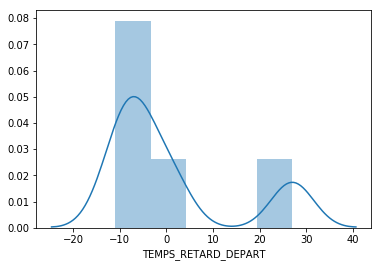

In [240]:
sns.distplot(y)
y.describe()

In [250]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


n_estimators = 10
max_depth = 10
max_features = 10

regressor = RandomForestRegressor(
    n_estimators=n_estimators, max_depth=max_depth, max_features=max_features)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
scores = cross_val_score(
    regressor, X_train, y_train, cv=3, scoring='neg_mean_squared_error'
)

rmse_scores = np.sqrt(-scores)

print(f"RMSE: {np.mean(rmse_scores):.4f} +/- {np.std(rmse_scores):.4f}")

# TEMPS_RETARD_ARRIVEE : RMSE: 17.2333 +/- 10.5053
# TEMPS_RETARD_DEPART : RMSE: 17.1333 +/- 10.0058

RMSE: 18.8667 +/- 10.0748


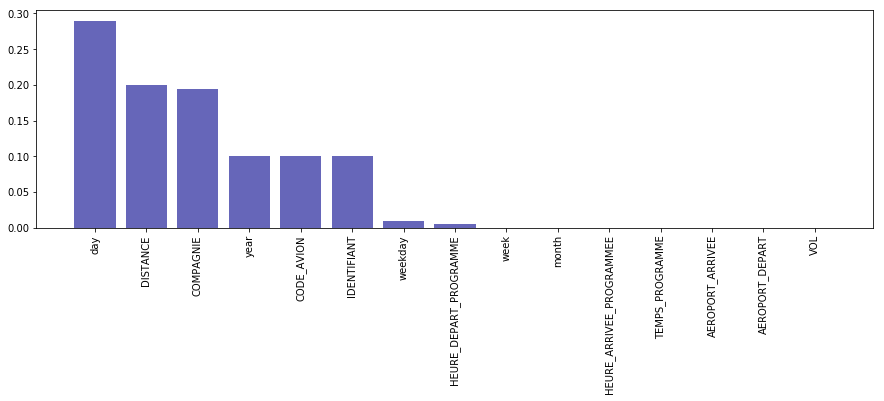

In [256]:
regressor = RandomForestRegressor(
    n_estimators=n_estimators, max_depth=max_depth, max_features=max_features)

regressor.fit(X_train, y_train)
feature_importance = regressor.feature_importances_
feature_names = np.array(list(X_train.columns))

idx = feature_importance.argsort()[::-1][:25]
importances_ord = feature_importance[idx]
feature_names_ord = np.array(feature_names)[idx]

plt.figure(figsize=(15,4))

plt.bar(feature_names_ord, importances_ord, 
         color = 'darkblue', alpha= 0.6);
plt.xticks(rotation=90);